In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random 

import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import anndata as ann

sc.settings.set_figure_params(dpi=100)

In [3]:
DATA_DIR = ""
FILE_SCRNA = ""
FILE_PROT = 

In [ ]:
data_scrna = pd.read_csv(f"{DATA_DIR}/{FILE_SCRNA}", index_col=0)

In [5]:
adata_prot = sc.read(f"{DATA_DIR}/{FILE_PROT}")

In [10]:
genes_scrna = data_scrna.index.tolist()
genes_prot = adata_prot.var_names.tolist()

common_genes = list(set(genes_scrna) & set(genes_prot))

In [18]:
print(f"There are {len(common_genes)} common genes between scrna and proteomics./")

There are 4507 common genes between scrna and proteomics./


In [39]:
data_scrna = data_scrna.loc[common_genes]
adata_prot_common = adata_prot[:, common_genes]

In [28]:
adata_prot_common = adata_prot_common[adata_prot_common.obs["region"] == "Calvaria"]

data_prot = pd.DataFrame(index=adata_prot_nd.var_names)
data_prot["Calvaria"] = adata_prot_nd.X.mean(axis=0)

In [31]:
from scipy.stats import pearsonr, spearmanr

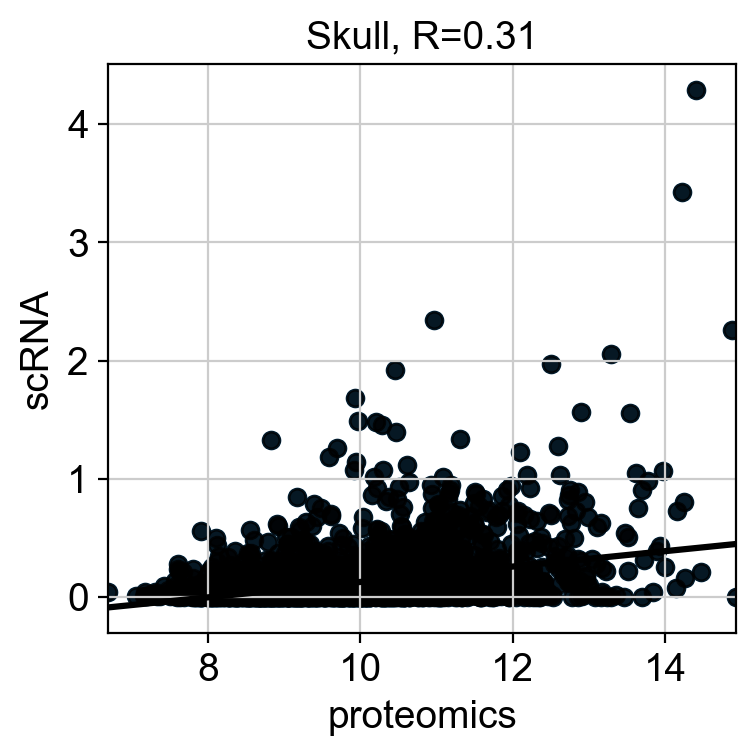

In [46]:
c="Calvaria"

data = pd.DataFrame()
data["scRNA"] = data_scrna[c].values
data["proteomics"] = data_prot[c].values

plt.scatter(data_prot[c], data_scrna[c])
r = spearmanr(data_prot[c], data_scrna[c].fillna(0))[0]

sns.regplot(
                x="proteomics",
                y="scRNA",
                data=data,
                ci=None,
                color="black"
    )
plt.title(f"Skull, R={r.round(2)}")
plt.tight_layout()
plt.show()